# Goals

Dense Neural Networks are an essential building block used in Deep Learning for image analysis. Our goals here are:
* Learn how to use a Neural Network in Classification
* How do I use a trained neural network
    * Using a Neural Network to predict good wine

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Classification

Classification is a problem where each of our examples (x) belongs to a class (y). Since Neural networks are universal function approximators, we can use

$P(y|x)$



## Binary Classification
When we just have 2 classes (A or B/True or False) then we only need to predict the probability of one since

$P(y=b|x)$=1-$P(y=a|x)$

Our network inputs are our features, and our network output is $P(y=a|x)$.

**Important:** We need to use the correct activation function and the correct loss function. We know $y_{pred}$
is between zero and one, so we can add a 'sigmoid' activation


$\sigma(x)=\frac{1}{1+e^{-x}}$

<img src='../../assets/sigmoid.png'>

For the loss function we use something called binary cross-entropy, which uses our labels (0 or 1) to train our network.

$L=\frac{1}{N}*\sum_i(-y_{true,i}*ln(y_{pred,i})-(1-y_{true,i})*ln(1-y_{pred,i}))$

Since our labels are only 0 or 1 this loss will 
* Make $-1*ln(y_{pred})$ as small as possible ($y_{pred}=1$) when $y_{true}=1$
* Make $-1*ln(1-y_{pred})$ as small as possible ($y_{pred}=0$) when $y_{true}=0$




## If you're curious

This is essentially the negative log likelihood of a Bernoulli distribution

$P(y,p)=p^{y}(1-p)^{1-y}$

$-ln(P(y,p))=-ln(p^{y}(1-p)^{1-y})= -y*ln(p)-(1-y)*ln(1-p)$

# What it Means for our Neural Network

* When we build our model we need to use a sigmoid activation on the last layer

    output=tf.keras.layers.Dense(1,activation='sigmoid')
    
    **or**
    
    dense=tf.keras.layers.Dense(1)
    
    output=tf.keras.layers.Activation('sigmoid')(dense)
    
    
* When we compile a model we need to use "binary_crossentropy" as a loss




In [2]:
#Class A
n_data=10000

y_train=np.ones(n_data) #Class A =1
y_develop=np.ones(n_data)
y_test=np.ones(n_data)

x_train=np.random.normal(1,1,size=n_data)
x_develop=np.random.normal(1,1,size=n_data)
x_test=np.random.normal(1,1,size=n_data)


#Class B
y_train=np.append(y_train,np.zeros(n_data)) #Class B=0
y_develop=np.append(y_develop,np.zeros(n_data)) 
y_test=np.append(y_test,np.zeros(n_data)) 

x_train=np.append(x_train,np.random.normal(-1,1,size=n_data))
x_develop=np.append(x_develop,np.random.normal(-1,1,size=n_data))
x_test=np.append(x_test,np.random.normal(-1,1,size=n_data))




# A simple way to look at a feature is a histogram
Plot how many times does class A have a feature value within a bin


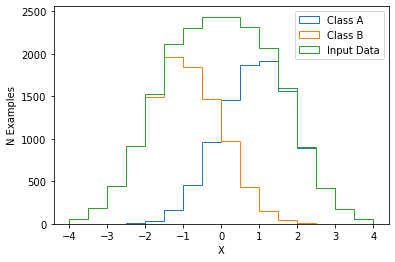

In [3]:
#Histogram for class A
a_mask=y_train==1
plt.hist(x_train[a_mask],bins=16,range=(-4,4),histtype='step',label='Class A')

#Histogram for Class B
b_mask=y_train==0
plt.hist(x_train[b_mask],bins=16,range=(-4,4),histtype='step',label='Class B')

plt.hist(x_train,bins=16,range=(-4,4),histtype='step',label='Input Data')

plt.xlabel('X')
plt.ylabel('N Examples')
plt.legend()
plt.show()

In [4]:

input_layer=tf.keras.layers.Input(shape=(1,)) 
###Same as Before###
nn = tf.keras.layers.Dense(20)(input_layer)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)
#Sigmoid!!!!
output_layer = tf.keras.layers.Dense(1,activation='sigmoid')(nn)

nn_model=tf.keras.models.Model(input_layer,output_layer)
nn_model.summary()
#Binary Cross Entropy!!!
nn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

nn_model.fit(x_train,y_train,validation_data=(x_develop,y_develop),epochs=10)

2022-01-31 14:53:07.953544: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-01-31 14:53:07.953591: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (n225): /proc/driver/nvidia/version does not exist
2022-01-31 14:53:07.954022: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 20)                40        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 20)                0     

2022-01-31 14:53:08.586792: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3723 - accuracy: 0.8295 - val_loss: 0.3546 - val_accuracy: 0.8419
Epoch 2/10
625/625 [==============================] - 1s 983us/step - loss: 0.3553 - accuracy: 0.8371 - val_loss: 0.3531 - val_accuracy: 0.8414
Epoch 3/10
625/625 [==============================] - 1s 987us/step - loss: 0.3552 - accuracy: 0.8372 - val_loss: 0.3532 - val_accuracy: 0.8421
Epoch 4/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3555 - accuracy: 0.8372 - val_loss: 0.3556 - val_accuracy: 0.8421
Epoch 5/10
625/625 [==============================] - 1s 997us/step - loss: 0.3556 - accuracy: 0.8367 - val_loss: 0.3536 - val_accuracy: 0.8422
Epoch 6/10
625/625 [==============================] - 1s 953us/step - loss: 0.3552 - accuracy: 0.8366 - val_loss: 0.3536 - val_accuracy: 0.8417
Epoch 7/10
625/625 [==============================] - 1s 955us/step - loss: 0.3551 - accuracy: 0.8373 - val_loss: 0.3535 - val_accuracy: 0.8

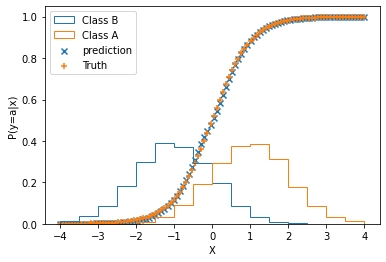

In [5]:

X_test=np.linspace(-4,4,100)
Y_true=1/(1+np.exp(-2*X_test))#Proof Left to Reader

Y_pred=nn_model.predict(X_test)
plt.scatter(X_test,Y_pred,label='prediction',marker='x')
plt.scatter(X_test,Y_true,label='Truth',marker='+')

plt.xlabel('X')
plt.ylabel('P(y=a|x)')

plt.hist(x_train[b_mask],bins=16,range=(-4,4),histtype='step',label='Class B',density=True)
plt.hist(x_train[a_mask],bins=16,range=(-4,4),histtype='step',label='Class A',density=True)

plt.legend()
plt.show() 

# Classification - Multi-Class






In [6]:
#Class A
n_data=10000

y_train=np.ones(n_data) #Class A =1
y_develop=np.ones(n_data)
y_test=np.ones(n_data)

x_train=np.random.normal(1,1,size=n_data)
x_develop=np.random.normal(1,1,size=n_data)
x_test=np.random.normal(1,1,size=n_data)


#Class B
y_train=np.append(y_train,np.zeros(n_data)) #Class B=0
y_develop=np.append(y_develop,np.zeros(n_data)) 
y_test=np.append(y_test,np.zeros(n_data)) 

x_train=np.append(x_train,np.random.normal(-1,1,size=n_data))
x_develop=np.append(x_develop,np.random.normal(-1,1,size=n_data))
x_test=np.append(x_test,np.random.normal(-1,1,size=n_data))

#Class B
y_train=np.append(y_train,np.ones(n_data)*2) #Class B=0
y_develop=np.append(y_develop,np.zeros(n_data)) 
y_test=np.append(y_test,np.zeros(n_data)) 

x_train=np.append(x_train,np.random.normal(-3,1,size=n_data))
x_develop=np.append(x_develop,np.random.normal(-1,1,size=n_data))
x_test=np.append(x_test,np.random.normal(-3,1,size=n_data))





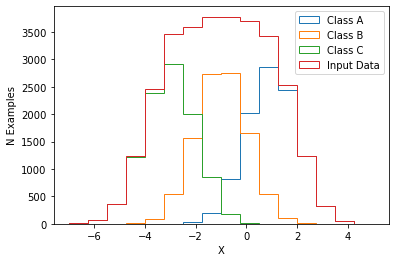

In [7]:
#Histogram for class A
a_mask=y_train==1
plt.hist(x_train[a_mask],bins=16,range=(-7,5),histtype='step',label='Class A')

#Histogram for Class B
b_mask=y_train==0
plt.hist(x_train[b_mask],bins=16,range=(-7,5),histtype='step',label='Class B')

c_mask=y_train==2
plt.hist(x_train[c_mask],bins=16,range=(-7,5),histtype='step',label='Class C')

plt.hist(x_train,bins=16,range=(-7,5),histtype='step',label='Input Data')

plt.xlabel('X')
plt.ylabel('N Examples')
plt.legend()
plt.show()





# Multi Class Loss

# Multi-Class Classification

**Reminder**
   * Classification is problem where each of our examples (x) belongs to a class (y). Since Neural networks are universal function approximators, we can use $P(y|x)$

**Like before to change our problem we need**
* The correct activation on our last layer - **softmax**
* The correct loss function - **categorical_crossentropy**

We have more than two classes (0,1,2...) and we need to predict the probability of all of them. However, we have a constraint that all the probabilities must sum to one.

**Our network**
 * Inputs are our images
 * Output is a Dense layer with dimension equal to the number of classes
     * Each output represents $\{P(y=0|x),(y=1|x),(y=2|x)\ ...\}$.
 * We require $\sum_i P(y=i|x) = 1$.

* To enforce this we use a different activation function: a **softmax**

    * $\sigma(x)_i= \frac{e^{x_i}}{\sum_i e^{x_i}}$
    
* Our loss function becomes

 $L=-\frac{1}{N}\sum_i \sum_n y_{true,i,n}*ln(y_{pred,i,n})$

* What this means
    * $y_{true,i,n}$ is a vector with a 1 in the dimention that example belongs to and a zero everywhere else
        *  i.e. Ankle boot = class 9 = (0,0,0,0,0,0,0,0,0,1)
    * The sum in this loss term  $\sum_n y_{true,i,n}*ln(y_{pred,i,n})$
        * is zero except for the one value when n=class of $y_{true}$
        * Then it's just $ln(y_{pred,i,n})$
        * This is same as binary classfication: make -1*$ln(y_{pred,i,n})$ as small as possible



Our input data set has labels stored as integers, but the labels we need for our loss function need to be  **one-hot** encoded

**one-hot** - A vector of zeros except for one entry with a 1 that represents the class of an object
   * i.e. Ankle boot = class 9 = (0,0,0,0,0,0,0,0,0,1)

keras has a utility to convert integers like this easily.

In [8]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 3)
y_develop_one_hot =  tf.keras.utils.to_categorical(y_develop, 3)
y_test_one_hot =  tf.keras.utils.to_categorical(y_test, 3)

print('Example:',y_train[0],'=',y_train_one_hot[0])

Example: 1.0 = [0. 1. 0.]


In [9]:
input_layer=tf.keras.layers.Input(shape=(1,)) 
###Same as Before###
nn = tf.keras.layers.Dense(20)(input_layer)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)

nn = tf.keras.layers.Dense(20)(nn)
nn = tf.keras.layers.LeakyReLU()(nn)
#Sigmoid!!!!
output_layer = tf.keras.layers.Dense(3,activation='softmax')(nn)

nn_model=tf.keras.models.Model(input_layer,output_layer)
nn_model.summary()
#Binary Cross Entropy!!!
nn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

nn_model.fit(x_train,y_train_one_hot,validation_data=(x_develop,y_develop_one_hot),epochs=10)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                40        
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 20)                0   

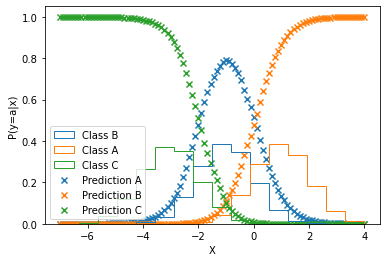

In [10]:
X_test=np.linspace(-7,4,100)
#Y_true=1/(1+np.exp(-2*X_test))#Proof Left to Reader

Y_pred=nn_model.predict(X_test)


plt.scatter(X_test,Y_pred[:,0],label='Prediction A',marker='x')
plt.scatter(X_test,Y_pred[:,1],label='Prediction B',marker='x')
plt.scatter(X_test,Y_pred[:,2],label='Prediction C',marker='x')


plt.xlabel('X')
plt.ylabel('P(y=a|x)')

plt.hist(x_train[b_mask],bins=16,range=(-7,4),histtype='step',label='Class B',density=True)
plt.hist(x_train[a_mask],bins=16,range=(-7,4),histtype='step',label='Class A',density=True)
plt.hist(x_train[c_mask],bins=16,range=(-7,4),histtype='step',label='Class C',density=True)

plt.legend()
plt.show() 

# Dense network summary

* Dense networks take fixed length input and have a fixed length output
* Like All Neural Network layers they require an activation function
    * The activation of the last layer is usally determined by the goal
        * Regression - Linear
        * Classification - Sigmoid
        * Multi-Class Classification - Softmax (more later)
* They can be stacked to represent more complicated functions
* You're taking your chances when predicting data that's very different from you're training data


# A Real World Example
We're going to use a number of measured values to try and predict good wine.
Source:https://archive.ics.uci.edu/ml/datasets/Wine+Quality (Cortez et al., 2009)

* Goal: Predict whether a wine is excellent based score given to the wine by an expert panel (1-10)
    * Score > 5 Excellent
    * Score <=5 Average

* Features:
  * 1 - fixed acidity
  * 2 - volatile acidity
  * 3 - citric acid
  * 4 - residual sugar
  * 5 - chlorides
  * 6 - free sulfur dioxide
  * 7 - total sulfur dioxide
  * 8 - density
  * 9 - pH
  * 10 - sulphates
  * 11 - alcohol
  * 12 - Red/White




# Step 1: Look at the data

In [11]:
import winedata
import importlib
importlib.reload(winedata)


wd=winedata.WineData()
print(wd.x_train.shape,wd.y_train.shape)

(4569, 12) (4569,)


In [12]:
wd.y_develop


array([ True, False, False, ...,  True,  True,  True])

Lets make histograms for each of our 12 input features, and check to see how many wines are labeled Excellent vs. Average

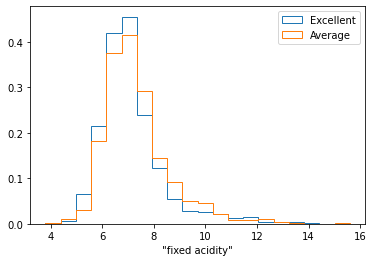

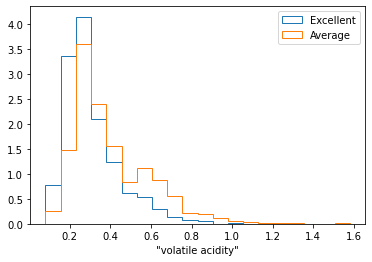

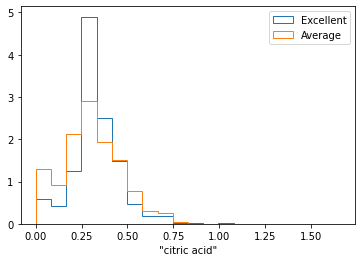

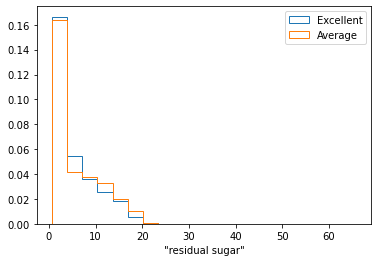

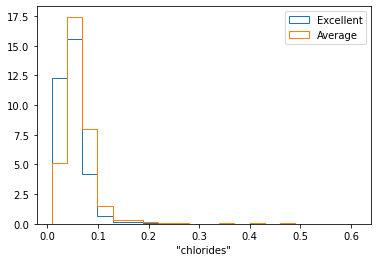

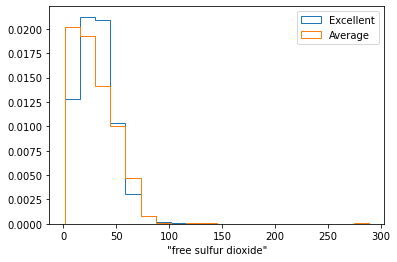

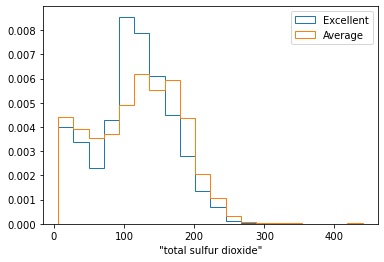

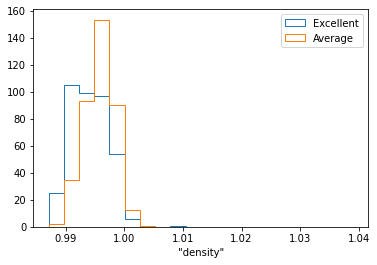

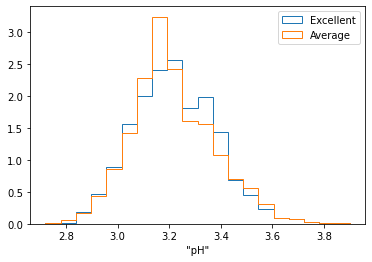

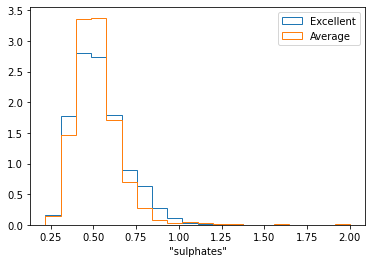

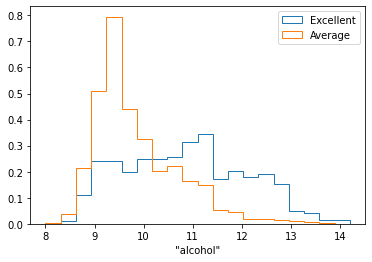

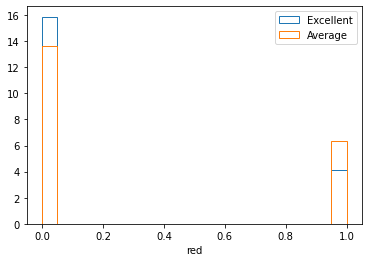

Excellent Data Points 2860
Average Data Points 1709


In [13]:
for n in range(12):
    good=[]
    bad=[]
    for vals,label in zip(wd.x_train,wd.y_train):
        if label:
            good.append(vals[n])
        else:
            bad.append(vals[n])

    label=wd.header[n]
    
    
    max_range=max([max(good),max(bad)])
    min_range=min([min(good),min(bad)])
    
    plt.hist(good,density=True,histtype='step',label='Excellent',range=(min_range,max_range),bins=20)
    plt.hist(bad,density=True,histtype='step',label='Average',range=(min_range,max_range),bins=20)
    plt.xlabel(label)
    plt.legend()
    plt.show()
print("Excellent Data Points",len(good))
print("Average Data Points",len(bad))

In [14]:
input_layer=tf.keras.layers.Input(shape=(12,)) 
###Lets Add another layer and an Activation
nn = tf.keras.layers.Dense(10)(input_layer)
nn = tf.keras.layers.LeakyReLU()(nn)

output_layer = tf.keras.layers.Dense(1,activation='sigmoid')(nn)
#A keras model is a way of going from one layer to the next
wine_model=tf.keras.models.Model(input_layer,output_layer)
wine_model.summary()
wine_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                130       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [15]:
wine_model.fit(wd.x_train,wd.y_train,epochs=50,validation_data=(wd.x_develop,wd.y_develop)) #Have Keras make a test/validation split for us


Epoch 1/50
143/143 [==============================] - 0s 1ms/step - loss: 5.7034 - accuracy: 0.5526 - val_loss: 1.3871 - val_accuracy: 0.4632
Epoch 2/50
143/143 [==============================] - 0s 813us/step - loss: 1.2071 - accuracy: 0.4382 - val_loss: 0.9783 - val_accuracy: 0.4787
Epoch 3/50
143/143 [==============================] - 0s 802us/step - loss: 0.8596 - accuracy: 0.4657 - val_loss: 0.7457 - val_accuracy: 0.4933
Epoch 4/50
143/143 [==============================] - 0s 830us/step - loss: 0.7138 - accuracy: 0.5651 - val_loss: 0.6681 - val_accuracy: 0.6504
Epoch 5/50
143/143 [==============================] - 0s 830us/step - loss: 0.6701 - accuracy: 0.6229 - val_loss: 0.6474 - val_accuracy: 0.6504
Epoch 6/50
143/143 [==============================] - 0s 820us/step - loss: 0.6599 - accuracy: 0.6176 - val_loss: 0.6464 - val_accuracy: 0.6504
Epoch 7/50
143/143 [==============================] - 0s 823us/step - loss: 0.6491 - accuracy: 0.6268 - val_loss: 0.6301 - val_accuracy: 0

In [16]:
#make a prediction
pred=wine_model.predict(wd.x_develop)



(1928, 1) (1928,)


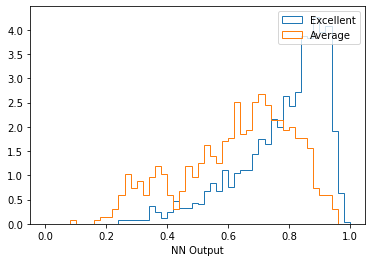

In [17]:
print(pred.shape,wd.y_develop.shape) 

plt.hist([p for i,p in zip(wd.y_develop,np.squeeze(pred)) if i],bins=50,range=(0,1),density=True,histtype='step',label="Excellent")
plt.hist([p for i,p in zip(wd.y_develop,np.squeeze(pred)) if not i],bins=50,range=(0,1),density=True,histtype='step',label="Average")

plt.legend()
plt.xlabel('NN Output')
plt.show()


(1928, 1)
821 1107


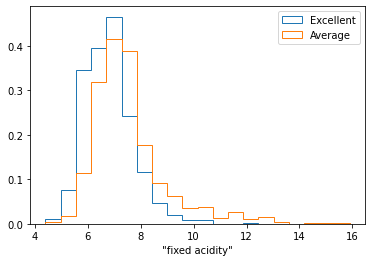

821 1107


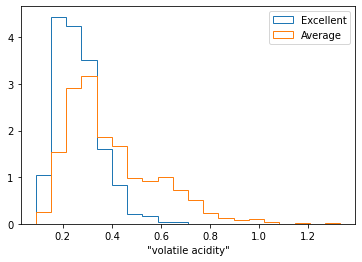

821 1107


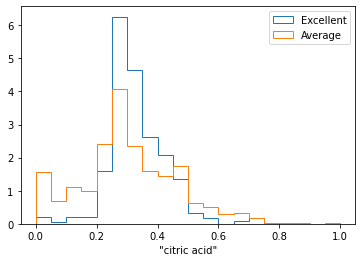

821 1107


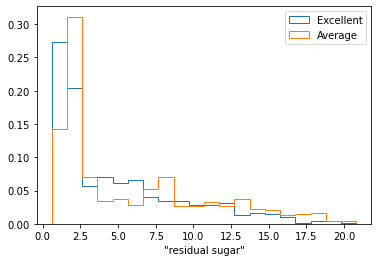

821 1107


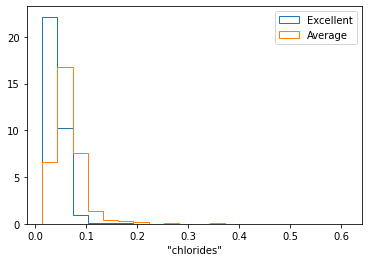

821 1107


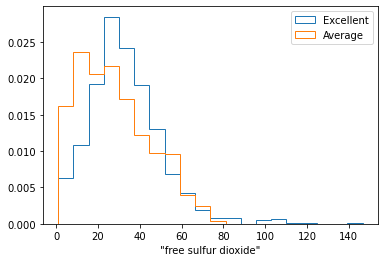

821 1107


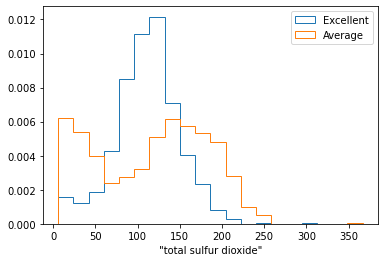

821 1107


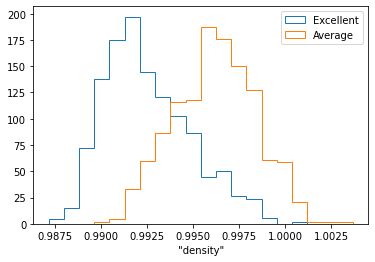

821 1107


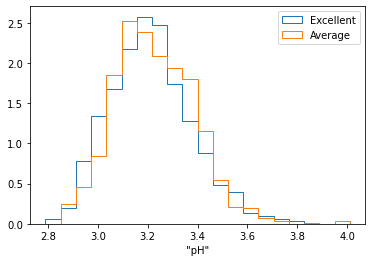

821 1107


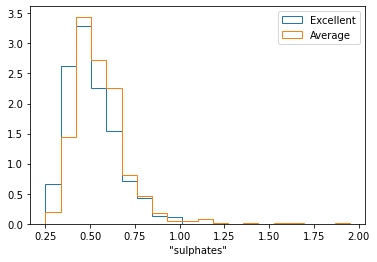

821 1107


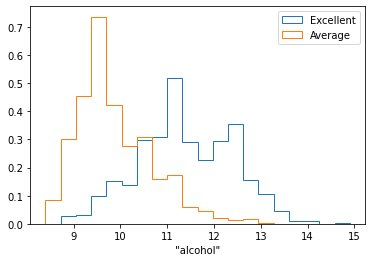

821 1107


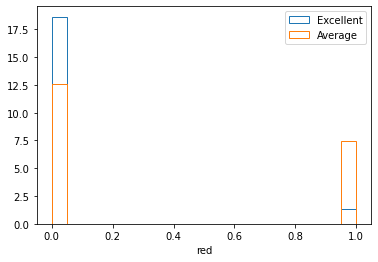

In [18]:
print(pred.shape)
for n in range(12):
    good=[]
    bad=[]
    for i,v in enumerate(pred[:,0]):
        if v >.8:
            good.append(wd.x_develop[i,n])
        else:
            bad.append(wd.x_develop[i,n])
    print(len(good),len(bad))
    label=wd.header[n]
    max_range=max([max(good),max(bad)])
    min_range=min([min(good),min(bad)])
    
    plt.hist(good,density=True,histtype='step',label='Excellent',range=(min_range,max_range),bins=20)
    plt.hist(bad,density=True,histtype='step',label='Average',range=(min_range,max_range),bins=20)
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Are we happy with the model's preformance on the develop set? 
* Yes let's confirm with the test set
    






In [19]:
#We can use the evaluate function to caculate the loss and accuracy of different datasets
develop_loss,develop_accuracy=wine_model.evaluate(wd.x_develop,wd.y_develop)

test_loss,test_accuracy=wine_model.evaluate(wd.x_test,wd.y_test)

print("Develop loss",develop_loss, " Develop Accuracy", develop_accuracy)
print("Test loss",test_loss, " Test Accuracy", test_accuracy)
print("Test Loss Differs from develop loss by ",round((test_loss-develop_loss)/(test_loss)*100,2), '%')


22/22 [==============================] - 0s 442us/step - loss: 0.5699 - accuracy: 0.7034
Develop loss 0.5704016089439392  Develop Accuracy 0.692427396774292
Test loss 0.5699011087417603  Test Accuracy 0.703377366065979
Test Loss Differs from develop loss by  -0.09 %


The Test loss should only slightly differ from the develop loss, if that's true you have a well trained network ready to evaluate new wine.


# Try it yourself can you train a better neural network?


* Start with the network above
* Try adding layers, or hidden units
* Watch the val_loss when training make sure it doesn't start going up 
* if it does stop the training 
* **Don't use test data yet!** we'll see who has the best accuracy on the test data at the end of the class 

## A few extra tools to help you
* Early Stopping can be used to automatically stop training if the val_loss stops going down

```python
stop_early=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
```
* patience = how many epochs to wait without improvement before stopping
* restore_best_weights = rewind to weights with the best validation loss!
* monitor = what early stopping is looking at, val_loss is normal, but you can also use val_accuracy or other metrics

You can use normalizations or not in your model, it is a layer that can be added like any other

```python
normalizer = tf.keras.layers.Normalization(axis=-1)(input_layer)
```


## Callbacks and Mertrics
When fitting a function you can use callbacks and metrics to control the process
 
**EarlyStopping is a callback** - callbacks run at the end of an epoch and are functions that cant stop training
 
 
* Callbacks are added when you fit
  
```python
wine_model.fit(wd.x_train,wd.y_train,validation_data=(wd.x_develop,wd.y_develop),callbacks=[stop_early])
```
    
    
**Metrics** are extra information that is calculated alongside the loss when fitting like 'accuracy'
  * metrics are added to the model when you compile
  
  
 ```python
    wine_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=lr),metrics=['accuracy'])

 ```


# Remember
* More layers and neurons give you better flexibility, but take longer to train and you need to worry more about overfitting
* Your input layer needs to be the same size as the number of features you'll use
* Your out layer needs to have the same size and activation function to match the problem
* Learning rates, batch sizes, training, and early stopping can all be used! As well as any other tricks you might know!

In [20]:
"Your code here"

'Your code here'

# Jake's Answer
There are a lot of options above if you have the time and compute power, one the best ways to optimizer your model is with a hyperparamter tuner!
https://www.tensorflow.org/tutorials/keras/keras_tuner
1. First you need to create a function that will build your model
2. All your hyperparamaters get sampled by a special variable 
    * i.e. hp.Int('NLayers',1,10) will give you an int from 1-10 you can use to pick the number of hidden layers
3. Pick a search startagy 
    * lots of these all try to find the best model with the fewest guesse possilbe I'll use BayesianOptimization
4. Let run for as long as you can


In [22]:
#!pip install -U keras-tuner
import keras_tuner as kt
import shutil

In [26]:
#Here is my function to build my model it looks for activations, layers, nuerons, etc.
def build_model(hp):
    activation=hp.Choice('Activation',['relu','elu','tanh','sigmoid','leaky'])
    n_layers=hp.Int('NLayers',1,10,default=3)
    n_units=hp.Int('NUnits',1,2048,step=1,default=20)
    dropout_rate=hp.Float('DropRate',0,.5,default=.1)
    normalize=hp.Boolean('Norm')
    
    
    input_layer=tf.keras.layers.Input(shape=(12)) 
    if normalize:
            nn=  normalizer = tf.keras.layers.Normalization(axis=-1)(input_layer)
            nn = tf.keras.layers.Dense(n_units)(nn)
    else:
            nn = tf.keras.layers.Dense(n_units)(input_layer)
            
    if activation=='leaky':
            nn = tf.keras.layers.LeakyReLU()(nn)
    else:
            nn = tf.keras.layers.Activation(activation)(nn)            
    nn=tf.keras.layers.Dropout(dropout_rate)(nn) 

    for i in range(n_layers-1):
        nn = tf.keras.layers.Dense(n_units)(nn)
        if activation=='leaky':
            nn = tf.keras.layers.LeakyReLU()(nn)
        else:
            nn = tf.keras.layers.Activation(activation)(nn)            
        nn=tf.keras.layers.Dropout(dropout_rate)(nn)
    output_layer = tf.keras.layers.Dense(1,activation='sigmoid')(nn)
    #A keras model is a way of going from one layer to the next
    wine_model=tf.keras.models.Model(input_layer,output_layer)
    lr=hp.Choice('LearningRate',[1e-4,1e-3,1e-2])
    
    wine_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=lr),metrics=['accuracy'])
    return wine_model

#Use early stopping to prevent overfitting
stop_early=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

##Here is another search option
#tuner = kt.Hyperband(build_model,objective='val_accuracy',max_epochs=1000,factor=3,directory='wine_opt',project_name='test2')
#tuner.search(wd.x_train,wd.y_train,validation_data=(wd.x_develop,wd.y_develop),callbacks=[stop_early])

#Search!
tuner = kt.BayesianOptimization(build_model,objective='val_accuracy',num_initial_points=10,max_trials=1000,executions_per_trial=5,directory='wine_opt',project_name='bayes')
tuner.search(wd.x_train,wd.y_train,epochs=500,validation_data=(wd.x_develop,wd.y_develop),callbacks=[stop_early])




Trial 621 Complete [00h 01m 06s]
val_accuracy: 0.7449170112609863

Best val_accuracy So Far: 0.7677157402038575
Total elapsed time: 00h 22m 29s

Search: Running Trial #622

Hyperparameter    |Value             |Best Value So Far 
Activation        |leaky             |leaky             
NLayers           |1                 |1                 
NUnits            |1788              |1787              
DropRate          |0                 |0                 
Norm              |True              |True              
LearningRate      |0.0001            |0.0001            

Epoch 1/500
143/143 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.6157 - val_loss: 0.6492 - val_accuracy: 0.6457
Epoch 2/500
143/143 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6415 - val_loss: 0.5926 - val_accuracy: 0.6680
Epoch 3/500
143/143 [==============================] - 0s 1ms/step - loss: 0.6050 - accuracy: 0.6557 - val_loss: 0.5805 - val_accuracy: 0.677

KeyboardInterrupt: 

In [24]:
my_model=tuner.get_best_models()[0]

# Final Answer? Check the Test Data

In [28]:

test_loss,test_accuracy=my_model.evaluate(wd.x_test,wd.y_test)
print("Test loss",test_loss, " Test Accuracy", test_accuracy)


22/22 [==============================] - 0s 695us/step - loss: 0.5033 - accuracy: 0.7577
Test loss 0.5033450722694397  Test Accuracy 0.757709264755249
